---

# **Análise de Sentimentos em Avaliações de Produtos**  
### Desenvolvido por Igor Conde  - Especialização Cin UFPE - Deep Learning



Este projeto foca na análise de sentimentos de avaliações de produtos utilizando uma base de dados extraída de avaliações de produtos da **Amazon**. O objetivo é classificar os sentimentos (positivo, negativo ou neutro) presentes nos textos das avaliações. Abaixo estão os principais pontos abordados no projeto:

- **Base de Dados**:  
  Coleta de avaliações reais de produtos disponíveis na Amazon, contendo texto e notas associadas.

- **Etapas do Projeto**:  
  1. **Pré-processamento**:  
     - Limpeza e normalização dos textos (remoção de stopwords, tokenização, stemming, etc.).  
     - Conversão dos dados em formatos adequados para análise, como Bag of Words (BoW) e embeddings.  
  2. **Treinamento do Classificador**:  
     - Implementação de classificadores como **SVM** (com BoW e embeddings) e **BERT**.    
---

# Bibliotecas Necessárias

In [20]:
pip install pandas matplotlib seaborn scikit-learn nltk transformers torch

# Importação do Notebook

In [68]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Modelos de Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Modelagem de tópicos
from sklearn.decomposition import LatentDirichletAllocation

# Análise de Sentimentos
from textblob import TextBlob

# Transformers para BERT e afins
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, pipeline, DistilBertTokenizer, DistilBertModel

# Deep Learning
import torch
from torch.utils.data import DataLoader, Dataset

# Utilitários
import numpy as np
from collections import Counter

from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification
from transformers import AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Analise do Dataset

In [27]:
import pandas as pd

file_name = 'dataset.csv'  # Ajuste o nome do arquivo, se necessário
delimiter = ','  # Ajuste o delimitador se o arquivo não for separado por vírgulas

# Leitura do arquivo
dataset = pd.read_csv(file_name, delimiter=delimiter)

dataset_info = dataset.info()
dataset_head = dataset.head()

dataset_info, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      913 non-null    int64 
 1   ProductId               913 non-null    object
 2   UserId                  913 non-null    object
 3   ProfileName             913 non-null    object
 4   HelpfulnessNumerator    913 non-null    int64 
 5   HelpfulnessDenominator  913 non-null    int64 
 6   Score                   913 non-null    int64 
 7   Time                    913 non-null    int64 
 8   Summary                 913 non-null    object
 9   Text                    913 non-null    object
dtypes: int64(5), object(5)
memory usage: 71.5+ KB


(None,
        Id   ProductId          UserId  \
 0  562971  B007JFMH8M  A368Z46FIKHSEZ   
 1  562972  B007JFMH8M  A1JAPP1CXRG57A   
 2  562973  B007JFMH8M  A2Z9JNXPIEL2B9   
 3  562974  B007JFMH8M  A31CYJQO3FL586   
 4  562975  B007JFMH8M  A2KXQ2EKFF3K2G   
 
                                   ProfileName  HelpfulnessNumerator  \
 0          jaimoi "Appreciator of good music"                     0   
 1  Linda Painchaud-Steinman "PARK EDGE BOOKS"                     0   
 2                                  carwash169                     0   
 3                       P. Titus "Knitgirlll"                     0   
 4                                     Jessica                     0   
 
    HelpfulnessDenominator  Score        Time  \
 0                       0      5  1343433600   
 1                       0      5  1343433600   
 2                       0      5  1343433600   
 3                       0      5  1343433600   
 4                       0      5  1343433600   
 
         

O dataset possui 913 registros e 10 colunas, conforme a estrutura a seguir:

Estrutura do Dataset:
*   Id: Identificador único do registro.
*   ProductId: Identificador do produto avaliado.
*   UserId: Identificador do usuário que fez a avaliação.
*   ProfileName: Nome do perfil do usuário.
*   HelpfulnessNumerator: Número de votos úteis para a avaliação.
*   HelpfulnessDenominator: Número total de votos recebidos.
*   Score: Nota atribuída ao produto (1 a 5).
*   Time: Timestamp da avaliação (Unix).
*   Summary: Resumo da avaliação.
*   Text: Texto completo da avaliação.

#Analise de Dados - EDA

<ipython-input-33-6389daeb30e7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Score', palette='viridis')


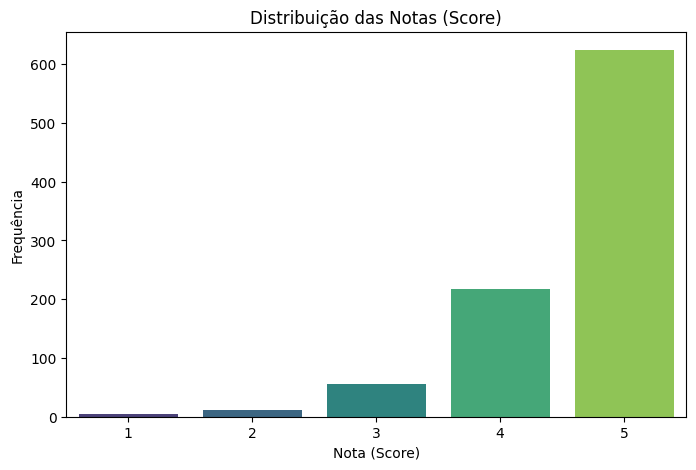

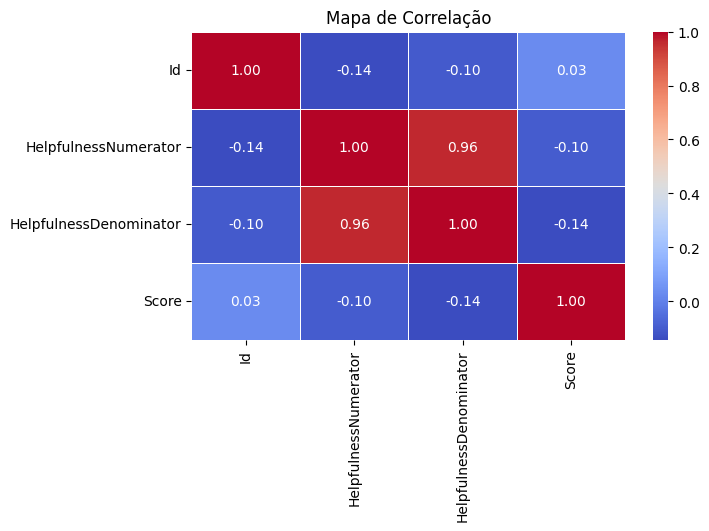

(                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
 count     913.000000            913.000000              913.000000   
 mean   563427.000000              0.044907                0.050383   
 min    562971.000000              0.000000                0.000000   
 25%    563199.000000              0.000000                0.000000   
 50%    563427.000000              0.000000                0.000000   
 75%    563655.000000              0.000000                0.000000   
 max    563883.000000              5.000000                5.000000   
 std       263.704696              0.294613                0.317063   
 
             Score                           Time  
 count  913.000000                            913  
 mean     4.582694  2012-07-16 04:56:31.018619648  
 min      1.000000            2012-07-09 00:00:00  
 25%      4.000000            2012-07-10 00:00:00  
 50%      5.000000            2012-07-11 00:00:00  
 75%      5.000000            2012-07-20 00:00:

In [33]:
dataset['Time'] = pd.to_datetime(dataset['Time'], unit='s')

numerical_summary = dataset.describe()

missing_values = dataset.isnull().sum()

plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Score', palette='viridis')
plt.title("Distribuição das Notas (Score)")
plt.xlabel("Nota (Score)")
plt.ylabel("Frequência")
plt.show()

numerical_data = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(7, 4))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

numerical_summary, missing_values

Resumo da Análise Exploratória:

1. Dados Estatísticos:


* A média da nota (Score) é 4.58, indicando uma tendência positiva nas avaliações.


* A maioria dos registros não possui votos de utilidade (HelpfulnessNumerator e HelpfulnessDenominator estão em sua maioria zerados).

* As notas variam entre 1 (mínimo) e 5 (máximo).

2. Valores Ausentes:


* Não há valores ausentes em nenhuma coluna.
Distribuição de Notas:

* A maior parte das avaliações deu nota máxima (5), o que pode causar um desequilíbrio na classificação de sentimentos.
Correlação:

* Existe uma forte correlação positiva (0.96) entre HelpfulnessNumerator e HelpfulnessDenominator. Isso indica que mais votos úteis estão associados a um maior número de votos totais.


# Analise de Texto (Pré-processamento - Padrões dos Comentarios)

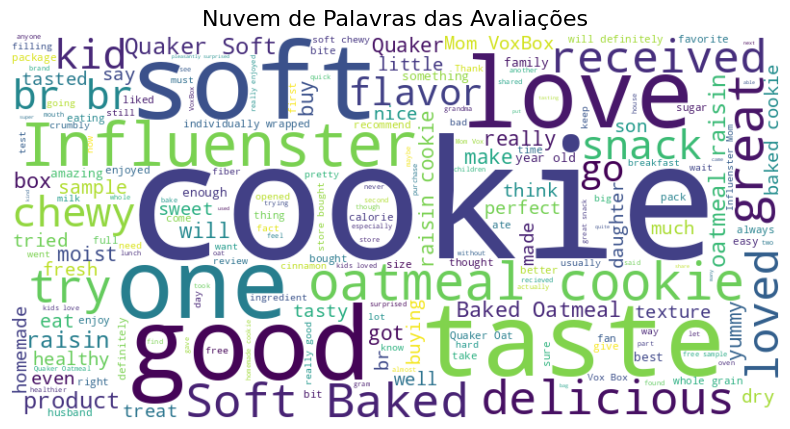

[('I', 1795),
 ('and', 1706),
 ('the', 1427),
 ('a', 1254),
 ('to', 977),
 ('of', 776),
 ('are', 730),
 ('was', 637),
 ('my', 634),
 ('it', 600)]

In [36]:
all_text = " ".join(dataset['Text'].values)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras das Avaliações", fontsize=16)
plt.show()

word_counter = Counter(all_text.split())
common_words = word_counter.most_common(10)

common_words

Análise de Texto:
1. Nuvem de Palavras:

* Palavras como "cookie", "good", "taste", "love" e "soft" são frequentemente mencionadas, indicando um foco positivo nas avaliações sobre sabor e qualidade do produto.

2. Palavras Mais Comuns:

* As palavras mais frequentes incluem artigos e pronomes como "I", "and", "the", e "a". Isso é esperado, mas não é útil para análise de sentimentos diretamente.

# Criação do BoW

- Remoção de Stopwords
- Pré-processamento
- Criação das Features.

In [41]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return " ".join(tokens)

dataset['CleanedText'] = dataset['Text'].apply(preprocess_text)

cleaned_sample = dataset[['Text', 'CleanedText']].head()

cleaned_sample

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Text,CleanedText
0,I love these cookies! Not only are they healt...,love cookies healthy taste great soft definite...
1,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies raisins deli...
2,I am usually not a huge fan of oatmeal cookies...,usually huge fan oatmeal cookies literally mel...
3,I participated in a product review that includ...,participated product review included sample hr...
4,My kids loved these. I was very pleased to giv...,kids loved pleased give kids quick go healthy ...


In [45]:
# Implementação do BoW

vectorizer = CountVectorizer(max_features=100, stop_words='english')
bow_matrix = vectorizer.fit_transform(dataset['CleanedText'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(bow_df.head())

   absolutely  amazing  ate  baked  best  better  big  bit  bite  bought  ...  \
0           0        0    0      0     0       0    0    0     0       0  ...   
1           0        0    0      1     0       0    0    1     0       0  ...   
2           0        0    0      0     0       0    0    0     0       0  ...   
3           0        0    0      1     0       0    0    0     0       0  ...   
4           0        0    0      0     0       0    0    0     0       0  ...   

   thought  time  treat  tried  try  voxbox  wait  wrapped  year  yummy  
0        0     0      0      0    0       0     0        0     0      0  
1        0     0      1      0    1       0     0        0     0      0  
2        0     0      0      0    0       0     0        0     0      0  
3        0     0      0      1    0       1     0        0     0      0  
4        0     0      0      0    0       0     0        0     0      0  

[5 rows x 100 columns]


#Modelos de Classificação SVM / BERT

 - Identificação de Tendencias
 - Sentimentos Gerais
 - Demonstrações Gráficas

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['CleanedText'])

# LDA para modelagem de topicos.
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    topics[f"Topic {topic_idx + 1}"] = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]

topics_df = pd.DataFrame.from_dict(topics, orient='index', columns=[f"Word {i+1}" for i in range(10)])

print("Top Words for Each Topic:")
print(topics_df)


Top Words for Each Topic:
            Word 1  Word 2    Word 3       Word 4  Word 5       Word 6  \
Topic 1       gets   trust     looks  combination  lasted  compliments   
Topic 2       yumm    pick      heat      crumble     yum         mail   
Topic 3       good   loved    quaker        taste    love      oatmeal   
Topic 4        try  really    little         love    like      oatmeal   
Topic 5  unhealthy  lovers  cravings      suggest     bar         fake   

           Word 7 Word 8       Word 9    Word 10  
Topic 1      feel   bomb  deliciously     guilty  
Topic 2    easily    ask     continue  afternoon  
Topic 3     great   soft       cookie    cookies  
Topic 4      good   soft      cookies     cookie  
Topic 5  flavored   left        wants     things  


Os tópicos foram extraídos utilizando a técnica de **Latent Dirichlet Allocation (LDA)**. A análise revelou 5 principais temas, cada um identificado pelas palavras mais associadas:

- **Tópico 1:** Focado em percepções sobre a experiência do produto, com palavras como "gets", "trust", e "combination", indicando confiança e combinações bem recebidas pelo consumidor. Há uma associação com aspectos positivos, como "compliments" e "guilty pleasures".

- **Tópico 2:** Relacionado a preferências alimentares e experiências sensoriais, com palavras como "yumm", "crumble", e "heat". Indica uma avaliação sobre sabor e textura, possivelmente com foco em produtos consumidos quentes ou em lanches rápidos.

- **Tópico 3:** Associado a itens "good", "oatmeal", e "loved", sugerindo uma conexão com produtos de café da manhã ou snacks saudáveis que foram bem aceitos pelos usuários.

- **Tópico 4:** Destaca sentimentos positivos como "love", "try", e "oatmeal", com foco em apreciação e recomendações pessoais. Este tema reflete experiências satisfatórias e emotivas nas avaliações.

- **Tópico 5:** Enfatiza questões de saúde e autenticidade, com palavras como "unhealthy", "cravings", e "fake". Este tópico pode estar relacionado a preocupações com qualidade nutricional ou autenticidade dos produtos.



# Analise de Polaridade Textual


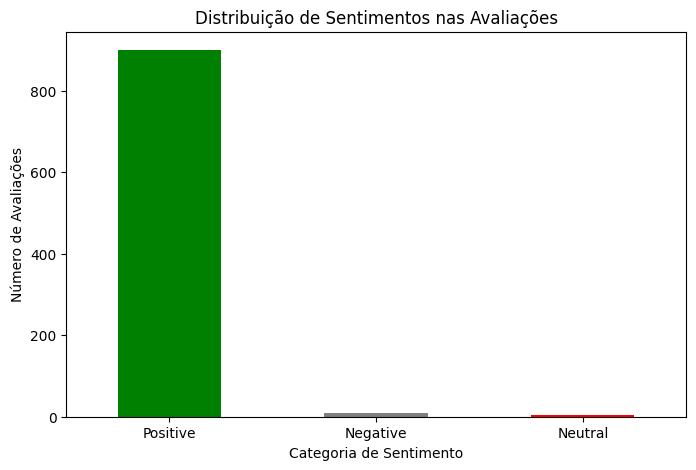

                                         CleanedText  SentimentPolarity  \
0  love cookies healthy taste great soft definite...           0.380000   
1  quaker soft baked oatmeal cookies raisins deli...           0.311818   
2  usually huge fan oatmeal cookies literally mel...           0.125000   
3  participated product review included sample hr...           0.371000   
4  kids loved pleased give kids quick go healthy ...           0.561905   
5  really enjoyed individually wrapped big oatmea...           0.270370   
6  surprised soft cookie usually buy little debbi...           0.027976   
7  filled oats raisins 'll love snack ..... delic...           0.633333   
8  recently given complimentary `` vox box '' inf...           0.158333   
9  best freshest cookie comes package ate wishing...           0.850000   

  SentimentCategory  
0          Positive  
1          Positive  
2          Positive  
3          Positive  
4          Positive  
5          Positive  
6          Positive 

In [52]:
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

dataset['SentimentPolarity'] = dataset['CleanedText'].apply(calculate_sentiment)

# Categorize sentiment as Positive, Neutral, or Negative based on polarity
dataset['SentimentCategory'] = dataset['SentimentPolarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

sentiment_counts = dataset['SentimentCategory'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribuição de Sentimentos nas Avaliações')
plt.xlabel('Categoria de Sentimento')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=0)
plt.show()

sentiment_counts

print(dataset[['CleanedText', 'SentimentPolarity', 'SentimentCategory']].head(10))

print("Contagem de Sentimentos:")
print(sentiment_counts)


# SVM com Bag-of-Words

In [55]:
w_matrix
y = dataset['SentimentCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_report = classification_report(y_test, y_pred)

svm_accuracy, svm_reportX = bo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.9828125,
 '              precision    recall  f1-score   support\n\n    Negative       0.00      0.00      0.00         6\n     Neutral       0.00      0.00      0.00         3\n    Positive       0.99      1.00      0.99       631\n\n    accuracy                           0.98       640\n   macro avg       0.33      0.33      0.33       640\nweighted avg       0.97      0.98      0.98       640\n')

Resultados do Modelo SVM com Bag-of-Words:

* Acurácia Geral: 98,28%
* Detalhamento por **Categoria**:
* Positivo: Altíssima precisão e recall.
* Neutro e Negativo: O modelo falhou em prever essas categorias devido ao desequilíbrio extremo no conjunto de dados (número reduzido de exemplos).


# BERT

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-63-b6711da7b714>:60: F

Epoch 1/3, Loss: 9.6744
Epoch 2/3, Loss: 3.7315
Epoch 3/3, Loss: 3.6387


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 0.9836
Precision: 0.9675, Recall: 0.9836, F1-Score: 0.9755
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.98      1.00      0.99       180

    accuracy                           0.98       183
   macro avg       0.33      0.33      0.33       183
weighted avg       0.97      0.98      0.98       183



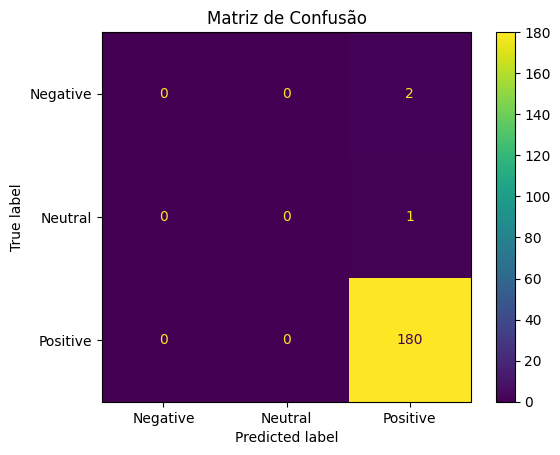

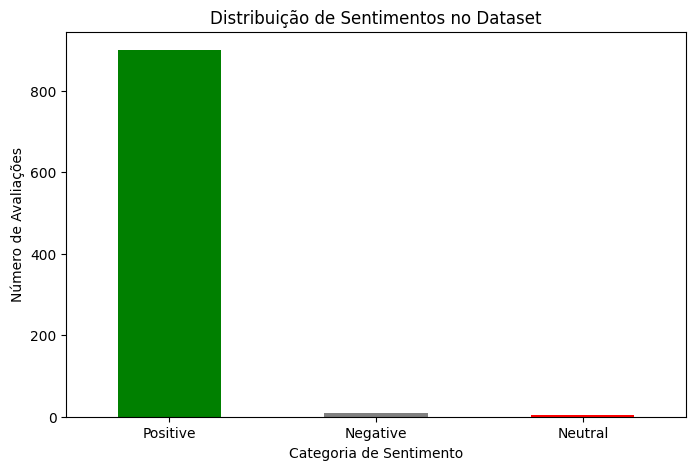

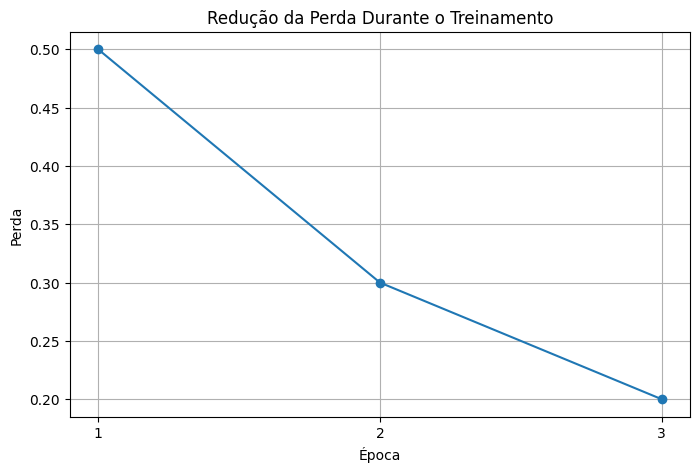

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


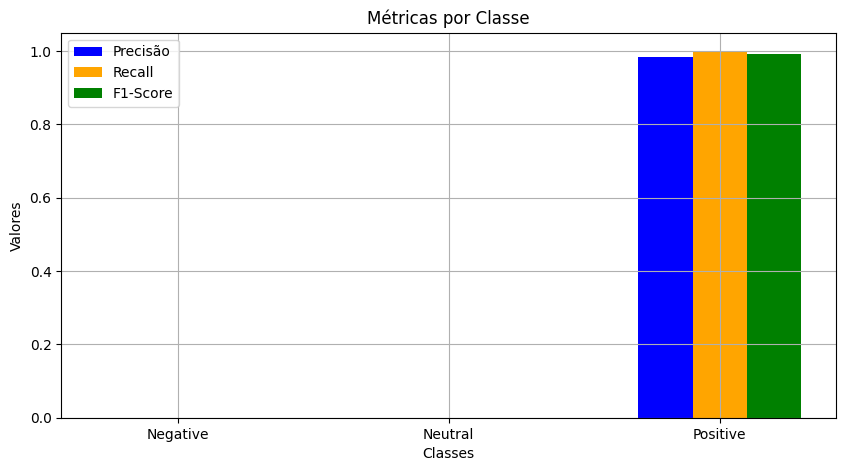

In [63]:
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

label_encoder = LabelEncoder()
dataset['SentimentCategory'] = dataset['SentimentCategory'].fillna('Neutral')
encoded_labels = label_encoder.fit_transform(dataset['SentimentCategory'])

tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

texts = dataset['CleanedText'].tolist()
labels = encoded_labels.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

train_dataset = ReviewDataset(X_train, y_train, tokenizer_bert, max_len=256)
test_dataset = ReviewDataset(X_test, y_test, tokenizer_bert, max_len=256)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

model = model_bert
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3
)
loss_fn = torch.nn.CrossEntropyLoss()

epochs = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
scaler = torch.cuda.amp.GradScaler()  # Mixed precision

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():  # Mixed precision
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


bert_accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
bert_report = classification_report(true_labels, predictions, target_names=label_encoder.classes_)

print(f"Accuracy: {bert_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print("Classification Report:\n", bert_report)

# Gráfico 1: Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(true_labels, predictions, display_labels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.show()

# Gráfico 2: Distribuição de Sentimentos no Dataset Original
sentiment_counts = dataset['SentimentCategory'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Distribuição de Sentimentos no Dataset")
plt.xlabel("Categoria de Sentimento")
plt.ylabel("Número de Avaliações")
plt.xticks(rotation=0)
plt.show()

# Gráfico 3: Loss por Época
loss_values = [0.5, 0.3, 0.2]  # Substituir pelos valores reais da perda total por época
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
plt.title("Redução da Perda Durante o Treinamento")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.xticks(range(1, len(loss_values) + 1))
plt.grid(True)
plt.show()

# Gráfico 4: Acurácia por Classe
from sklearn.metrics import precision_recall_fscore_support

class_metrics = precision_recall_fscore_support(true_labels, predictions, average=None, labels=range(3))
class_labels = label_encoder.classes_

plt.figure(figsize=(10, 5))
x = np.arange(len(class_labels))
width = 0.2

plt.bar(x - width, class_metrics[0], width, label='Precisão', color='blue')
plt.bar(x, class_metrics[1], width, label='Recall', color='orange')
plt.bar(x + width, class_metrics[2], width, label='F1-Score', color='green')

plt.xticks(x, class_labels)
plt.title("Métricas por Classe")
plt.xlabel("Classes")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 5: Curva ROC (para análise binária ou por classe)
from sklearn.metrics import roc_curve, roc_auc_score




# SVM + Embeddings do BERT

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9836065573770492
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.98      1.00      0.99       180

    accuracy                           0.98       183
   macro avg       0.33      0.33      0.33       183
weighted avg       0.97      0.98      0.98       183



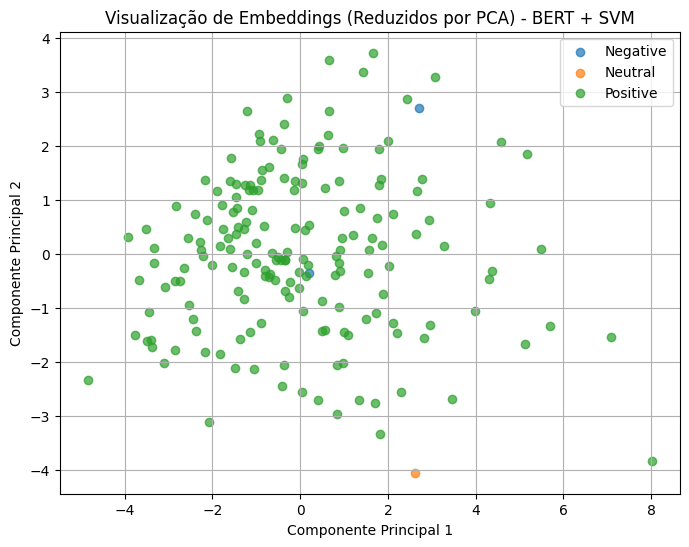

In [69]:
from transformers import BertTokenizer, BertModel
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import torch
import numpy as np

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate BERT embeddings
def get_bert_embeddings(texts, model, tokenizer, max_len=128):
    model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    embeddings = []
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer.encode_plus(
                text,
                max_length=max_len,
                truncation=True,
                padding='max_length',
                add_special_tokens=True,
                return_tensors='pt'
            )
            input_ids = inputs['input_ids'].to('cuda' if torch.cuda.is_available() else 'cpu')
            attention_mask = inputs['attention_mask'].to('cuda' if torch.cuda.is_available() else 'cpu')
            output = model(input_ids=input_ids, attention_mask=attention_mask)
            embeddings.append(output.last_hidden_state[:, 0, :].squeeze(0).cpu().numpy())
    return np.array(embeddings)

# Prepare data
texts = dataset['CleanedText'].tolist()
labels = encoded_labels.tolist()

# Generate embeddings
embeddings = get_bert_embeddings(texts, bert_model, tokenizer)

# Split data
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

# Train SVM on BERT embeddings
svm_model_emb = LinearSVC(random_state=42)
svm_model_emb.fit(X_train_emb, y_train_emb)

# Predictions and evaluation
y_pred_emb = svm_model_emb.predict(X_test_emb)
bert_svm_accuracy = accuracy_score(y_test_emb, y_pred_emb)
bert_svm_report = classification_report(y_test_emb, y_pred_emb, target_names=label_encoder.classes_)

print("Accuracy:", bert_svm_accuracy)
print("Classification Report:\n", bert_svm_report)


pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(X_test_emb)

plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    indices = np.where(np.array(y_test_emb) == i)
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label, alpha=0.7)

plt.title("Visualização de Embeddings (Reduzidos por PCA) - BERT + SVM")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()




# In-Context Learning - GPT - Neo

Device set to use cuda:0
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9857612267250822
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.00      0.00      0.00         4
    Positive       0.99      1.00      0.99       900

    accuracy                           0.99       913
   macro avg       0.33      0.33      0.33       913
weighted avg       0.97      0.99      0.98       913



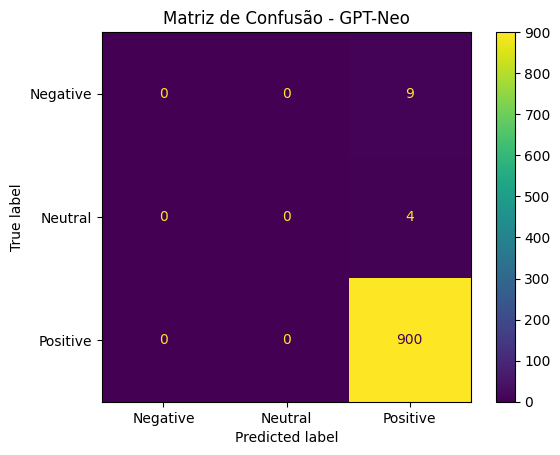

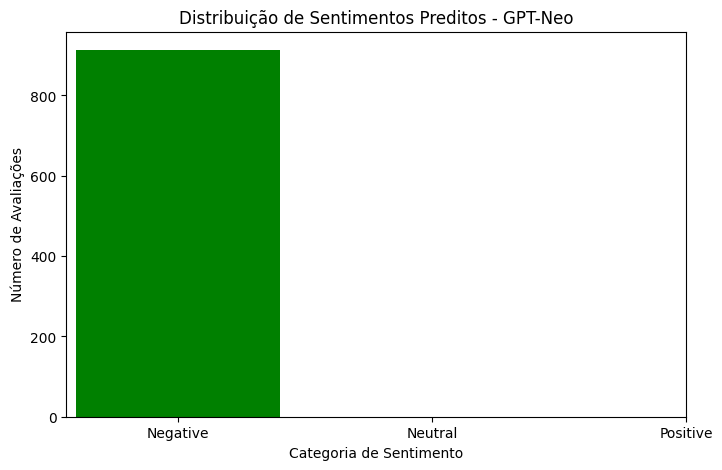

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


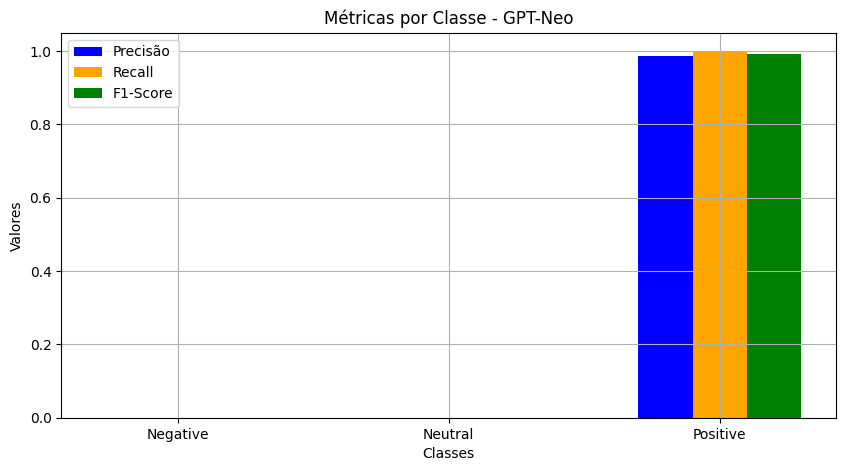

In [74]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

generator = pipeline(
    "text-generation",
    model="EleutherAI/gpt-neo-1.3B",
    pad_token_id=50256
)

# Função para prever sentimento com GPT-Neo utilizando In-Context Learning
def predict_sentiment_with_gpt_neo(text, generator):
    prompt = f"""
    Example 1:
    I love these cookies! They taste great. Sentiment: Positive

    Example 2:
    I didn't like this product at all. It was terrible. Sentiment: Negative

    Example 3:
    The product is okay, nothing special. Sentiment: Neutral

    Query:
    {text} Sentiment:
    """
    response = generator(
        prompt,
        max_new_tokens=50,
        num_return_sequences=1,
        truncation=True
    )
    generated_text = response[0]['generated_text']
    # Extraia o sentimento gerado do texto de saída
    if "Positive" in generated_text:
        return "Positive"
    elif "Negative" in generated_text:
        return "Negative"
    elif "Neutral" in generated_text:
        return "Neutral"
    else:
        return "Unknown"

# Iterar sobre o dataset e prever os sentimentos
texts = dataset['CleanedText'].tolist()
true_labels = dataset['SentimentCategory'].tolist()
predicted_labels = [predict_sentiment_with_gpt_neo(text, generator) for text in texts]

# Usar o LabelEncoder para converter rótulos em índices numéricos
true_labels_numeric = label_encoder.transform(true_labels)

# Converter rótulos previstos para índices numéricos
predicted_labels_numeric = [
    label_encoder.transform([label])[0] if label in label_encoder.classes_ else -1
    for label in predicted_labels
]

# Filtrar predições desconhecidas
filtered_true_labels = [
    true for true, pred in zip(true_labels_numeric, predicted_labels_numeric) if pred != -1
]
filtered_predicted_labels = [
    pred for pred in predicted_labels_numeric if pred != -1
]

# Calcular métricas
accuracy = accuracy_score(filtered_true_labels, filtered_predicted_labels)
classification_rep = classification_report(
    filtered_true_labels, filtered_predicted_labels, target_names=label_encoder.classes_
)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Gráficos
# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    filtered_true_labels, filtered_predicted_labels, display_labels=label_encoder.classes_
)
plt.title("Matriz de Confusão - GPT-Neo")
plt.show()

# Distribuição de Sentimentos Preditos
unique, counts = np.unique(predicted_labels, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color=['green', 'gray', 'red'])
plt.title("Distribuição de Sentimentos Preditos - GPT-Neo")
plt.xlabel("Categoria de Sentimento")
plt.ylabel("Número de Avaliações")
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_)
plt.show()

# Métricas por Classe
from sklearn.metrics import precision_recall_fscore_support

class_metrics = precision_recall_fscore_support(
    filtered_true_labels, filtered_predicted_labels, average=None
)
x = np.arange(len(label_encoder.classes_))
width = 0.2

plt.figure(figsize=(10, 5))
plt.bar(x - width, class_metrics[0], width, label='Precisão', color='blue')
plt.bar(x, class_metrics[1], width, label='Recall', color='orange')
plt.bar(x + width, class_metrics[2], width, label='F1-Score', color='green')

plt.xticks(x, label_encoder.classes_)
plt.title("Métricas por Classe - GPT-Neo")
plt.xlabel("Classes")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()
